In [3]:
import pandas as pd

file_path = r"D:\Rishika Internship\snapdeal_products_clean_data.csv"

df = pd.read_csv(file_path, encoding="latin1")

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
print(df[['Discount', 'Rating (detail)']].describe())


          Discount  Rating (detail)
count  5645.000000      5651.000000
mean     69.360673         3.130508
std      12.983441         1.769612
min       6.000000         0.000000
25%      63.000000         2.800000
50%      71.000000         3.900000
75%      79.000000         4.200000
max      93.000000         5.000000


In [13]:
df[["Discount", "Rating (detail)"]].dtypes

Discount           float64
Rating (detail)    float64
dtype: object

In [16]:
data = df.copy()

# Drop rows where Discount or Rating is missing
data = data.dropna(subset=['Discount', 'Rating (detail)'])

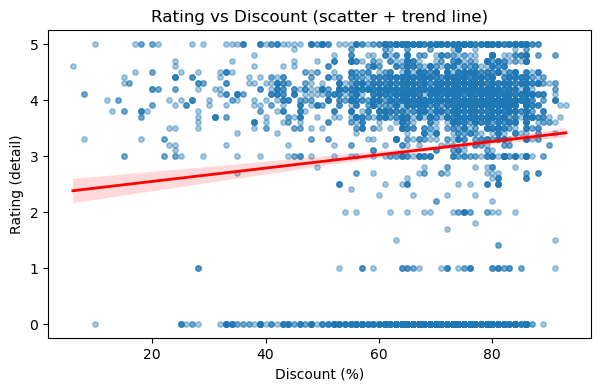

In [21]:
plt.figure(figsize=(7,4))
sns.regplot(data=data, x='Discount', y='Rating (detail)',
            scatter_kws={'alpha': 0.4, 's': 15},
            line_kws={'color':'red','linewidth': 2})
plt.title('Rating vs Discount (scatter + trend line)')
plt.xlabel('Discount (%)')
plt.ylabel('Rating (detail)')
plt.show()


In [18]:
from scipy import stats

pearson_r, pearson_p = stats.pearsonr(data['Discount'], data['Rating (detail)'])

print("Pearson correlation (r):", round(pearson_r, 3))
print("P-value:", pearson_p)


Pearson correlation (r): 0.087
P-value: 5.529467395910934e-11


In [19]:
spearman_r, spearman_p = stats.spearmanr(data['Discount'], data['Rating (detail)'])

print("Spearman correlation (rho):", round(spearman_r, 3))
print("P-value:", spearman_p)


Spearman correlation (rho): 0.058
P-value: 1.5254711435496201e-05


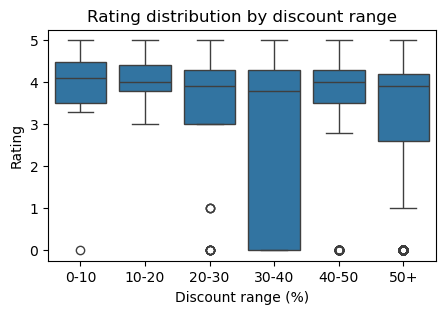

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Create discount buckets
bins = [0, 10, 20, 30, 40, 50, 100]          # ranges of discount
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50+']

data['Discount_Bin'] = pd.cut(
    data['Discount'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# 2) Boxplot: Rating vs Discount range
plt.figure(figsize=(5,3))
sns.boxplot(x='Discount_Bin', y='Rating (detail)', data=data)

plt.xlabel('Discount range (%)')
plt.ylabel('Rating')
plt.title('Rating distribution by discount range')
plt.show()
